# Fake news classifier project

In [1]:
# Importing necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Importing the dataset

In [4]:
df = pd.read_csv(r"C:\Users\Admin\Downloads\fake_news_train.csv")
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [5]:
df.shape

(20800, 5)

In [6]:
df.describe()

,id,label
count,20800.000000,20800.000000
mean,10399.500000,0.500625
std,6004.587135,0.500012
min,0.000000,0.000000
25%,5199.750000,0.000000
50%,10399.500000,1.000000
75%,15599.250000,1.000000
max,20799.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


## Exploratory data analysis(EDA)

In [8]:
# Checking for NA values

In [9]:
df.isna().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [10]:
# Using heatmap to see the null values in each column

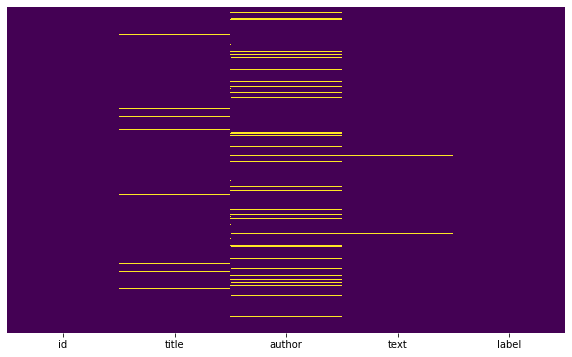

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

#### Since the NA values cant be replaced, they should be dropped

In [12]:
df.dropna(inplace=True)

In [13]:
df.isna().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

#### Dropping the "id" column as it is not useful in the analysis

In [14]:
df = df.drop(columns = "id", axis=1)

In [15]:
df.columns

Index(['title', 'author', 'text', 'label'], dtype='object')

In [16]:
# Checking the unique values in the dataset

In [17]:
df.nunique()

title     17931
author     3838
text      18017
label         2
dtype: int64

In [18]:
# Checking the value_counts of "label" column

In [19]:
df.label.value_counts()

0    10361
1     7924
Name: label, dtype: int64

Text(0.5, 0, 'Fake news label')

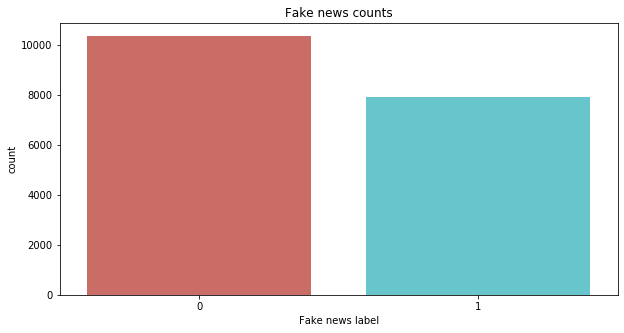

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(df.label,palette="hls")
plt.title("Fake news counts")
plt.xlabel("Fake news label")

## Data cleaning and preprocessing

In [21]:
news = df.copy()

In [22]:
news.shape

(18285, 4)

In [23]:
news.reset_index(inplace= True)

In [24]:
# Importing necessary NLP libraries

In [25]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [26]:
# Importing stopwords

In [27]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Cleaning the data

In [28]:
corpus = []
ps = PorterStemmer()

for i in range(0, news.shape[0]):
    # Removing special characters from "title"
    title = re.sub(pattern = '[^a-zA-Z]', repl=' ', string = news.title[i])
    
    # Converting the title to lowercase
    title = title.lower()
    
    # Tokenizing the news titles into words 
    words = title.split()
    
    # removing the stop words
    words = [word for word in words if word not in set(stopwords.words('english'))]
    
    # Stemming the words
    words = [ps.stem(word) for word in words]
    
    # Joining the stem words
    title = ' '.join(words)
    
    # Building a corpus of news title 
    corpus.append(title)

In [29]:
corpus[0:10]

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag']

In [30]:
# Create the bag of words

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

In [32]:
cv = CountVectorizer(max_features=10000)

In [33]:
# Independent variable

In [34]:
X = cv.fit_transform(corpus).toarray()

In [35]:
X.shape

(18285, 10000)

In [36]:
X[0:10]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [37]:
# Dependent variable

In [38]:
y = news['label']

In [39]:
# Spitting the data into train and test data

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state=0)

In [42]:
print(X_train.shape)
print(X_test.shape)

(14628, 10000)
(3657, 10000)


## Model building

In [43]:
# Building Naive Bayes model

In [44]:
from sklearn.naive_bayes import MultinomialNB

In [45]:
nb_classifier = MultinomialNB()

In [46]:
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [47]:
# Predicting the values

In [48]:
y_pred_train = nb_classifier.predict(X_train)
y_pred_test = nb_classifier.predict(X_test)

In [49]:
# Confusion matrix

In [50]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [51]:
cm_train = confusion_matrix(y_train, y_pred_train)
cm_train

array([[8009,  312],
       [ 608, 5699]], dtype=int64)

In [52]:
cm_test = confusion_matrix(y_test, y_pred_test)
cm_test

array([[1909,  131],
       [ 223, 1394]], dtype=int64)

In [53]:
# Checking accuracy, precision and recall

In [54]:
# For training

In [55]:
Accuracy = accuracy_score(y_train, y_pred_train)
Precision = precision_score(y_train, y_pred_train)
Recall = recall_score(y_train, y_pred_train)

In [56]:
print("Accuracy for train: ", Accuracy)
print("Precision for train: ", Precision)
print("Recall for train: ", Recall)

Accuracy for train:  0.9371069182389937
Precision for train:  0.9480951588753951
Recall for train:  0.9035991755192643


In [57]:
# For testing

In [58]:
Accuracy = accuracy_score(y_test, y_pred_test)
Precision = precision_score(y_test, y_pred_test)
Recall = recall_score(y_test, y_pred_test)

In [59]:
print("Accuracy for test: ", Accuracy)
print("Precision for test: ", Precision)
print("Recall for test: ", Recall)

Accuracy for test:  0.9031993437243643
Precision for test:  0.9140983606557377
Recall for test:  0.8620902906617193


### Hyperparameter tuning of Naive Bayes model

In [60]:
# Tuning the parameter 'alpha' to improve the accuracy

In [61]:
for i in np.arange(0.1,1.1,0.1):
    temp_classifier = MultinomialNB(alpha=i)
    temp_classifier.fit(X_train,y_train)
    temp_y_pred = temp_classifier.predict(X_test)
    score = accuracy_score(y_test, temp_y_pred)
    print("Accuracy for alpha = {} is {}%".format(round(i,1),round(score)))

Accuracy for alpha = 0.1 is 1%
Accuracy for alpha = 0.2 is 1%
Accuracy for alpha = 0.3 is 1%
Accuracy for alpha = 0.4 is 1%
Accuracy for alpha = 0.5 is 1%
Accuracy for alpha = 0.6 is 1%
Accuracy for alpha = 0.7 is 1%
Accuracy for alpha = 0.8 is 1%
Accuracy for alpha = 0.9 is 1%
Accuracy for alpha = 1.0 is 1%


#### The best accuracy is 100% at alpha = 1

### Logistic regression

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
lr_classifier = LogisticRegression(random_state=0)

In [64]:
lr_classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [65]:
# Predicting the values

In [66]:
y_pred_train = lr_classifier.predict(X_train)

In [67]:
y_pred_test = lr_classifier.predict(X_test)

In [68]:
# Confusion matrix

In [69]:
confusion_matrix(y_train, y_pred_train)

array([[8060,  261],
       [  50, 6257]], dtype=int64)

In [70]:
confusion_matrix(y_test, y_pred_test)

array([[1849,  191],
       [  52, 1565]], dtype=int64)

In [71]:
# Accuracy score, precision and recall

In [72]:
# For training

In [73]:
Accuracy = accuracy_score(y_train, y_pred_train)
Precision = precision_score(y_train, y_pred_train)
Recall = recall_score(y_train, y_pred_train)

In [74]:
print("Accuracy for train: ", Accuracy)
print("Precision for train: ", Precision)
print("Recall for train: ", Recall)

Accuracy for train:  0.9787394038829642
Precision for train:  0.9599570420374348
Recall for train:  0.9920723006183606


In [75]:
# For testing

In [76]:
Accuracy = accuracy_score(y_test, y_pred_test)
Precision = precision_score(y_test, y_pred_test)
Recall = recall_score(y_test, y_pred_test)

In [77]:
print("Accuracy for test: ", Accuracy)
print("Precision for test: ", Precision)
print("Recall for test: ", Recall)

Accuracy for test:  0.933552091878589
Precision for test:  0.8912300683371298
Recall for test:  0.9678416821273964


### Hyperparameter tuning for logistic regression

In [78]:
for i in np.arange(0.1,1.1,0.1):
  temp_classifier = LogisticRegression(C=i, random_state=0)
  temp_classifier.fit(X_train, y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(y_test, temp_y_pred)
  print("Accuracy score for C={} is: {}%".format(round(i,1), round(score)))

Accuracy score for C=0.1 is: 1%
Accuracy score for C=0.2 is: 1%
Accuracy score for C=0.3 is: 1%
Accuracy score for C=0.4 is: 1%
Accuracy score for C=0.5 is: 1%
Accuracy score for C=0.6 is: 1%
Accuracy score for C=0.7 is: 1%
Accuracy score for C=0.8 is: 1%
Accuracy score for C=0.9 is: 1%
Accuracy score for C=1.0 is: 1%


#### Since logistic regression is giving highest accuracy, it is used to predict the test values

In [79]:
classifier = LogisticRegression(C=0.8, random_state=0)

In [80]:
classifier.fit(X_train, y_train)

LogisticRegression(C=0.8, random_state=0)

## Prediction of test data values using final model

In [81]:
# Defining a process to clean the data before prediction

In [82]:
def check_genuinity(sample_news):
    sample_news = re.sub(pattern = '[^a-zA-Z]', repl=' ', string=sample_news)
    sample_news = sample_news.lower()
    sample_news_words = sample_news.split()
    sample_news_words = [word for word in sample_news_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    final_news = [ps.stem(word) for word in sample_news_words]
    final_news = ' '.join(final_news)
    
    temp = cv.transform([final_news]).toarray()
    return classifier.predict(temp)

In [83]:
# Importing the test dataset

In [84]:
df_test = pd.read_csv(r"C:\Users\Admin\Downloads\fake_news_test.csv")
df_test.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [85]:
df_test.columns

Index(['id', 'title', 'author', 'text'], dtype='object')

In [86]:
news_title = df_test['title']

In [87]:
news_title.shape

(5200,)

In [88]:
# Generating the random integer

In [89]:
from random import randint

In [90]:
# predicting the values

In [91]:
row = randint(0, news_title.shape[0]-1)
sample_news = news_title[row]

print('News: {}'.format(sample_news))
if check_genuinity(sample_news):
    print("Prediction: This is a FAKE news")
else:
    print("Prediction: This is a REAL news")

News: Bundy Brothers and ‘Co-Conspirators’ Acquitted in Oregon — but the Saga Isn’t Over Yet
Prediction: This is a FAKE news


In [92]:
# Checking few more news

In [93]:
row = randint(0, news_title.shape[0]-1)
sample_news = news_title[row]

print('News: {}'.format(sample_news))
if check_genuinity(sample_news):
    print("Prediction: This is a FAKE news")
else:
    print("Prediction: This is a REAL news")

News: DHS Authorizes Hiring 10K Immigration Officers
Prediction: This is a REAL news


In [94]:
row = randint(0, news_title.shape[0]-1)
sample_news = news_title[row]

print('News: {}'.format(sample_news))
if check_genuinity(sample_news):
    print("Prediction: This is a FAKE news")
else:
    print("Prediction: This is a REAL news")

News: Jackie Mason: Plumbers Should Win Oscars, We Can Live Without’ Movie Stars
Prediction: This is a FAKE news


In [95]:
row = randint(0, news_title.shape[0]-1)
sample_news = news_title[row]

print('News: {}'.format(sample_news))
if check_genuinity(sample_news):
    print("Prediction: This is a FAKE news")
else:
    print("Prediction: This is a REAL news")

News: Federal Investigators Search for Cause of Deadly Hoboken Train Crash - The New York Times
Prediction: This is a REAL news
